# Series Temporales: TP1
### GONZALEZ Nehuen
### MADOERY PABLO

In [9]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### En primer lugar cargamos los datos, seteamos la columna index como trimestres y convertimos los datos a double.

In [10]:
data = pd.read_csv('datasets/Telefonia_movil.csv')
data = data.set_index(pd.date_range(start='01/01/2013', end='03/01/2019', freq='3M'))
data['Minutos pospago salientes (miles)'] = data['Minutos pospago salientes (miles)'].map(lambda x: x.replace('.',''))
data['Minutos pospago salientes (miles)'] = data['Minutos pospago salientes (miles)'].astype('double')
data['Minutos prepago salientes (miles)'] =  data['Minutos prepago salientes (miles)'].astype('double')
data['Total de minutos salientes (miles)'] =  data['Total de minutos salientes (miles)'].astype('double')
data.head(30)

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
2013-01-31,2013,1,8785943.0,6582117.0,15368060.0,Ene-Mar 2013
2013-04-30,2013,2,9512689.0,7108640.0,16621329.0,Abr-Jun 2013
2013-07-31,2013,3,10315484.0,7335154.0,17650638.0,Jul-Sept 2013
2013-10-31,2013,4,9809515.0,6250549.0,16060064.0,Oct-Dic 2013
2014-01-31,2014,1,10128751.0,5799223.0,15927974.0,Ene-Mar 2013
2014-04-30,2014,2,10821463.0,6438071.0,17259534.0,Abr-Jun 2014
2014-07-31,2014,3,11524344.0,7179152.0,18703495.0,Jul-Sept 2014
2014-10-31,2014,4,11997330.0,7147630.0,19144961.0,Oct-Dic 2014
2015-01-31,2015,1,10273637.0,6480172.0,16753809.0,Ene-Mar 2015
2015-04-30,2015,2,11226576.0,6579819.0,17806395.0,Abr-Jun 2015


In [11]:
data.describe()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
count,25.000000,25.000000,2.500000e+01,2.500000e+01,2.500000e+01
mean,2015.640000,2.440000,1.235930e+07,6.562909e+06,1.892220e+07
std,1.845716,1.157584,2.085582e+06,5.168604e+05,1.982378e+06
min,2013.000000,1.000000,8.785943e+06,5.380710e+06,1.536806e+07
25%,2014.000000,1.000000,1.082146e+07,6.250549e+06,1.765064e+07
50%,2016.000000,2.000000,1.190507e+07,6.579819e+06,1.900123e+07
75%,2017.000000,3.000000,1.424022e+07,7.077838e+06,2.036436e+07
max,2019.000000,4.000000,1.596076e+07,7.335154e+06,2.289966e+07


### Para cada trimestre existen 3 atributos que queremos ser capaces de analizar y predecir: Minutos prepago salientes, Minutos pospago salientes y Total de minutos salientes


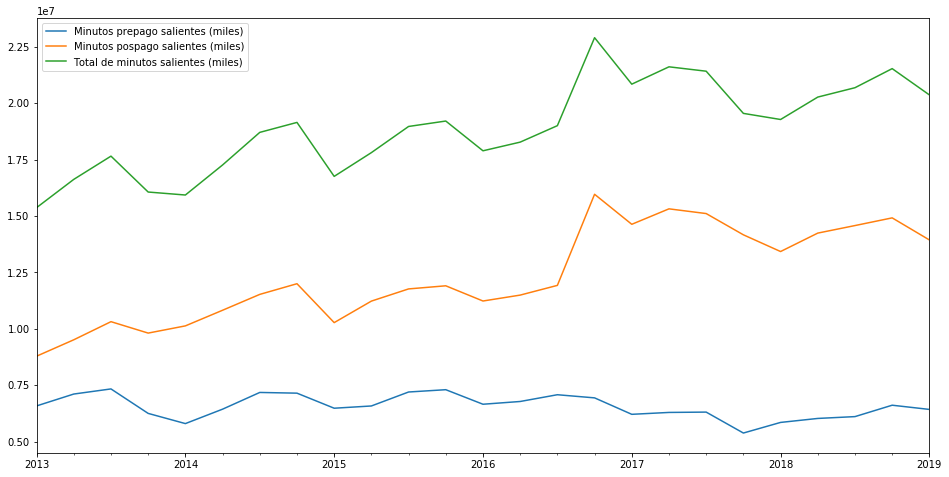

In [12]:
fig, ax= plt.subplots(figsize=(16,8))
prepago = 'Minutos prepago salientes (miles)'
pospago = 'Minutos pospago salientes (miles)'
total = 'Total de minutos salientes (miles)'
data.plot(ax = ax, y=[prepago, pospago, total])

### Realizamos una primera exploración de modelos ExponentialSmoothing para comparar los aditivos vs los multiplicativos

In [17]:
y1 = data[prepago]

In [18]:
def hw_summary(model_sm):
    rmse_sm = sm.tools.eval_measures.rmse(model_sm.data.endog,model_sm.fittedvalues)
    print(' In-sample fit:')
    print(' RMSE               {0:.3f}'.format(rmse_sm))
    return model_sm.summary()

In [19]:
m1=sm.tsa.ExponentialSmoothing(y1, 
                                       trend='add', 
                                       damped=False, 
                                       seasonal='add', 
                                       seasonal_periods=4).fit()
hw_summary(m1)

 In-sample fit:
 RMSE               498930.433


Dep. Variable:,endog,No. Observations:,25
Model:,ExponentialSmoothing,SSE,6223289428949.590
Optimized:,True,AIC,672.011
Trend:,Additive,BIC,681.762
Seasonal:,Additive,AICC,687.725
Seasonal Periods:,4,Date:,"Mon, 30 Sep 2019"
Box-Cox:,False,Time:,19:47:13
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3051592,alpha,True
smoothing_slope,3.3566e-16,beta,True


In [20]:
m2=sm.tsa.ExponentialSmoothing(y1, 
                                       trend='add', 
                                       damped=False, 
                                       seasonal='mul', 
                                       seasonal_periods=4).fit()
hw_summary(m2)

 In-sample fit:
 RMSE               373724.090


Dep. Variable:,endog,No. Observations:,25
Model:,ExponentialSmoothing,SSE,3491742393469.614
Optimized:,True,AIC,657.564
Trend:,Additive,BIC,667.315
Seasonal:,Multiplicative,AICC,673.278
Seasonal Periods:,4,Date:,"Mon, 30 Sep 2019"
Box-Cox:,False,Time:,19:47:14
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9999999,alpha,True
smoothing_slope,4.6105e-13,beta,True


### Observamos que el modelo multiplicativo tiene una mejor performance

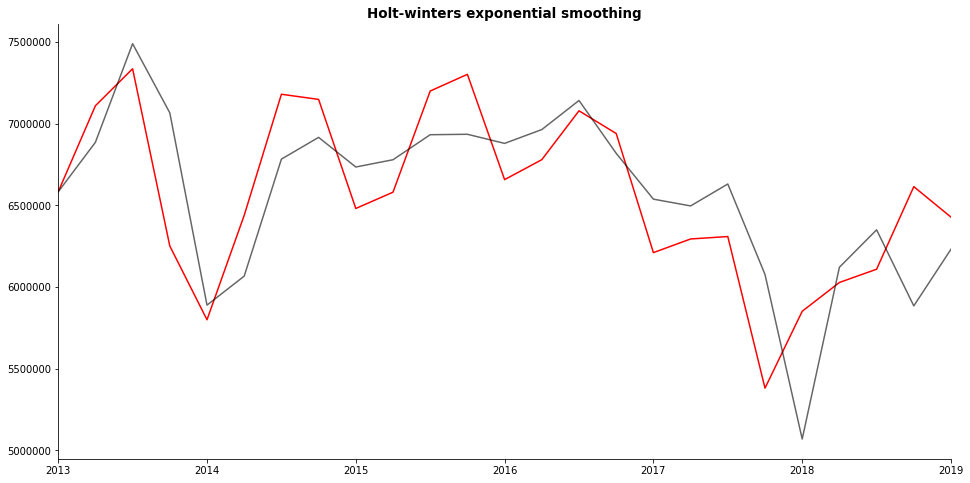

In [21]:
smoothed=pd.Series(m2.fittedvalues, index=data.index)
fig, ax= plt.subplots(figsize=(16,8))
data[prepago].plot(color='red', label='Prepago')
smoothed.plot(color='black', label='Smoothed', alpha=0.6)
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title('Holt-winters exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

### A continuación realizamos una comparación entre estos modelos con un Seasonal Random Walk: 

In [23]:
actual= []
pred1 = [] # seasonal random walk
pred2 = [] # additive holt winters
pred3 = [] # multiplicative holt winters
indices = []

for i in range(8, len(y1)):
    
    indices.append(y1.index[i])
    
    actual.append(y1.iloc[i]) # actual value
    
    pred1.append(y1.iloc[i-4]) # seasonal random walk forecast
    
    mod2 = sm.tsa.ExponentialSmoothing(y1.iloc[:i], trend='add', damped=False, seasonal='add', seasonal_periods=4).fit()
    pred2.append(mod2.forecast(1)[0]) # additive holt winters forecast
    
    mod3 = sm.tsa.ExponentialSmoothing(y1.iloc[:i], trend='add', damped=False, seasonal='mul', seasonal_periods=4).fit()
    pred3.append(mod3.forecast(1)[0]) # multiplicate holt winters forecast
    



/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/mado

In [24]:
columns=['seasonal random walk', 'additive holt winters', 'multiplicative holt winters', 'Actual']
results = np.vstack([pred1,pred2,pred3,actual]).T
results = pd.DataFrame(results, columns=columns, index=indices)


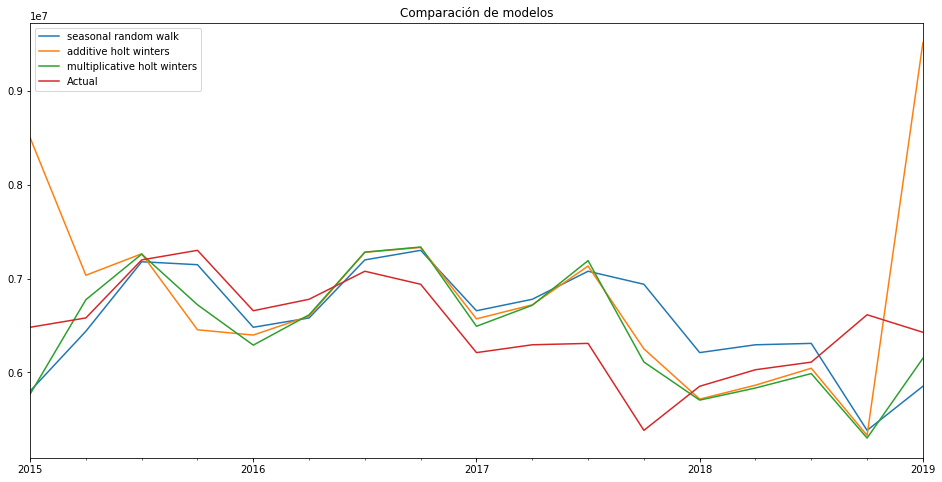

In [25]:
fig, ax= plt.subplots(figsize=(16,8))
results.plot(ax = ax, title='Comparación de modelos')

In [26]:
from scipy import stats

table = pd.DataFrame(0.0, index=results.columns[:-1], columns=['RMSE','SE'])
for i in range(len(results.columns)-1):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results.iloc[:,i], results.iloc[:,-1])
    table.iloc[i,1] = (results.iloc[:,i] - results.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
seasonal random walk,607353.031,150461.101
additive holt winters,1037789.644,245194.190
multiplicative holt winters,525642.223,130992.253


### Podemos observar que el mejor modelo es el multiplicative holt winters que supera tanto al additive holt winters como al seasonal random walk